# LAB: Introducción a Pandas 1

## 1. Introducción

Usaremos en este caso una versión muy resumida de datos de la Encuesta Permanentes de Hogares (relevamiento llevado adelante por el INDEC). Se trata de una encuesta continua que tiene como objetivo fundamental generar información sobre el funcionamiento del mercado de trabajo.

Solamente utilizaremos algunas variables (edad, nivel educativo, cantidad de horas trabajadas, calificación de la tarea e ingreso laboral) y algunos casos (los ocupados, es decir, aquellos que han trabajado al menos una hora en la semana anterior al relevamiento).

### 1.1 Importamos los paquetes a usar

In [2]:
import pandas as pd

### 1.2 Importamos los datos a usar

In [4]:
df = pd.read_csv("../Data/data_filt.csv"
           , encoding = 'latin1')

## 2. Explorando el dataset

### 2.1. ¿Cuántas filas y cuántas columnas tiene el dataset?

In [5]:
df.shape

(23448, 5)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23448 entries, 0 to 23447
Data columns (total 7 columns):
edad                 23448 non-null int64
nivel_educativo      23448 non-null object
hs_trabajadas        23448 non-null int64
calif_ocupacional    23448 non-null object
ingreso_ult_mes      23448 non-null float64
calificado           23448 non-null bool
educado              23448 non-null bool
dtypes: bool(2), float64(1), int64(2), object(2)
memory usage: 961.8+ KB


In [7]:
df.head()

,ch06,nivel_ed,htot,calif,p47t
0,46,1_H/Sec inc,45,2_Op./No calif.,6000.0
1,26,2_Sec. comp y más,25,2_Op./No calif.,5000.0
2,47,2_Sec. comp y más,25,2_Op./No calif.,5000.0
3,52,1_H/Sec inc,90,2_Op./No calif.,11000.0
4,45,1_H/Sec inc,44,2_Op./No calif.,9500.0


### 2.2 ¿Qué información tiene el dataset? Imprimir el nombre de las columnas

In [10]:
df.columns

Index(['ch06', 'nivel_ed', 'htot', 'calif', 'p47t'], dtype='object')

Los nombres de columna no son muy descriptivos de la información que contienen las mismas. Probemos cambiarlos por la siguiente lista: 

['edad', 'nivel_educativo', 'hs_trabajadas', 'calif_ocupacional', 'ingreso_ult_mes']

In [11]:
df.columns = ['edad', 'nivel_educativo', 'hs_trabajadas', 'calif_ocupacional', 'ingreso_ult_mes']

In [12]:
df.head()

,edad,nivel_educativo,hs_trabajadas,calif_ocupacional,ingreso_ult_mes
0,46,1_H/Sec inc,45,2_Op./No calif.,6000.0
1,26,2_Sec. comp y más,25,2_Op./No calif.,5000.0
2,47,2_Sec. comp y más,25,2_Op./No calif.,5000.0
3,52,1_H/Sec inc,90,2_Op./No calif.,11000.0
4,45,1_H/Sec inc,44,2_Op./No calif.,9500.0


### 2.3 ¿Cómo está indexado el dataset?

In [13]:
df.index

RangeIndex(start=0, stop=23448, step=1)

### 2.4 ¿Cuál es el tipo de la cuarta columna?

In [18]:
df['calif_ocupacional'].dtype

dtype('O')

In [94]:
df.iloc[:,3].dtype

dtype('O')

### 2.4 ¿Cuál es el nivel educativo más común?

In [20]:
df['nivel_educativo'].value_counts()

2_Sec. comp y más    14634
1_H/Sec inc           8814
Name: nivel_educativo, dtype: int64

### 2.5 ¿Y cómo se distribuye la población según calificación? 

In [21]:
df['calif_ocupacional'].value_counts()

2_Op./No calif.    17372
1_Prof./Tecn.       6076
Name: calif_ocupacional, dtype: int64

### 2.6 ¿Cuál es el ingreso total de la población? 

In [23]:
df['ingreso_ult_mes'].sum()

190114176.0

### 2.4 ¿Cuál es el ingreso medio de la población? 

In [24]:
df['ingreso_ult_mes'].mean()

8107.905834186285

## 3. Indexando y ordenando los datos

### 3.1 Seleccionar la columna `nivel_educativo` e `ingreso_ult_mes` y asignarlas a un objeto nuevo llamado `df2`

In [26]:
df2 = df[['nivel_educativo', 'ingreso_ult_mes']]
df2.head()

,nivel_educativo,ingreso_ult_mes
0,1_H/Sec inc,6000.0
1,2_Sec. comp y más,5000.0
2,2_Sec. comp y más,5000.0
3,1_H/Sec inc,11000.0
4,1_H/Sec inc,9500.0


### 3.2 Seleccionar de df2 las primeras 20 filas

In [27]:
df2[:20]

,nivel_educativo,ingreso_ult_mes
0,1_H/Sec inc,6000.0
1,2_Sec. comp y más,5000.0
2,2_Sec. comp y más,5000.0
3,1_H/Sec inc,11000.0
4,1_H/Sec inc,9500.0
5,2_Sec. comp y más,6000.0
6,2_Sec. comp y más,9000.0
7,1_H/Sec inc,4260.0
8,1_H/Sec inc,3800.0
9,2_Sec. comp y más,10517.0


### 3.2 Seleccionar de df una muestra aleatoria de 500 filas

In [30]:
df.sample(500)

,edad,nivel_educativo,hs_trabajadas,calif_ocupacional,ingreso_ult_mes
16837,27,2_Sec. comp y más,33,2_Op./No calif.,5000.0
15454,21,2_Sec. comp y más,20,2_Op./No calif.,3000.0
23435,39,1_H/Sec inc,48,2_Op./No calif.,3500.0
13422,40,1_H/Sec inc,10,2_Op./No calif.,4000.0
6604,44,2_Sec. comp y más,10,2_Op./No calif.,800.0
12184,31,2_Sec. comp y más,48,2_Op./No calif.,7000.0
7268,32,2_Sec. comp y más,25,1_Prof./Tecn.,2600.0
8817,34,2_Sec. comp y más,10,2_Op./No calif.,5200.0
14944,41,2_Sec. comp y más,36,2_Op./No calif.,9000.0
6293,25,2_Sec. comp y más,48,2_Op./No calif.,4000.0


### 3.4 Elegir todas las columnas, con excepción de nivel_educativo. Tip: Utilizar la propiedad columns para filtrar en la dimensión de las columnas.

In [95]:
# df[[column for column in df.columns if column != 'nivel_educativo']]
df.loc[:, df.columns != 'nivel_educativo']

,edad,hs_trabajadas,calif_ocupacional,ingreso_ult_mes,calificado,educado
0,46,45,2_Op./No calif.,6000.0,False,False
1,26,25,2_Op./No calif.,5000.0,False,True
2,47,25,2_Op./No calif.,5000.0,False,True
3,52,90,2_Op./No calif.,11000.0,False,False
4,45,44,2_Op./No calif.,9500.0,False,False
5,38,72,1_Prof./Tecn.,6000.0,False,True
6,40,44,2_Op./No calif.,9000.0,False,True
7,53,72,2_Op./No calif.,4260.0,False,False
8,24,55,2_Op./No calif.,3800.0,False,False
9,44,60,2_Op./No calif.,10517.0,False,True


### 3.5 Ordenar el dataset según la edad

In [50]:
df.sort_values('edad')

,edad,nivel_educativo,hs_trabajadas,calif_ocupacional,ingreso_ult_mes
15308,12,1_H/Sec inc,7,2_Op./No calif.,250.0
19856,12,1_H/Sec inc,15,2_Op./No calif.,1200.0
20050,12,1_H/Sec inc,20,2_Op./No calif.,1600.0
5698,12,1_H/Sec inc,5,2_Op./No calif.,250.0
14556,13,1_H/Sec inc,14,2_Op./No calif.,800.0
15198,13,1_H/Sec inc,6,2_Op./No calif.,800.0
16659,13,1_H/Sec inc,60,2_Op./No calif.,3000.0
3776,14,1_H/Sec inc,20,2_Op./No calif.,1000.0
6027,14,1_H/Sec inc,6,2_Op./No calif.,2316.0
6462,14,1_H/Sec inc,3,2_Op./No calif.,250.0


### 3.6 ¿Cuál es el promedio de horas trabajadas de los jóvenes entre 14 y 25 años y poco calificados?

In [64]:
condition = (df['edad'] >= 14) & (df['edad'] <= 25) & (df['calif_ocupacional'] == '2_Op./No calif.')
df['hs_trabajadas'][condition].mean()

37.57085900688655

### 3.7 Generar un dataframe nuevo con los trabajadores que ganan más del promedio de ingresos general y están por debajo de la cantidad media de horas trabajadas. ¿Cuántos trabajadores se encuentran en esta condición? ¿Cuál es su edad mediana?

In [99]:
def df3():
    ingresos_avg = df['ingreso_ult_mes'].mean()
    horas_avg = df['hs_trabajadas'].mean()
    condition = (df['ingreso_ult_mes'] > ingresos_avg ) & (df['hs_trabajadas'] < horas_avg )
    return df[condition]
%timeit df3
#df3 = df3()
#df3.shape

10000000 loops, best of 3: 25.8 ns per loop


In [79]:
df3['edad'].median()

44.0

In [82]:
%matplotlib inline

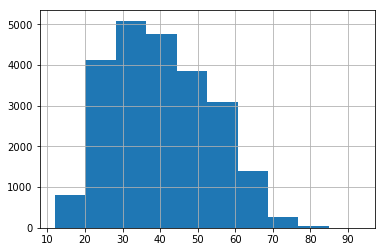

In [83]:
df['edad'].hist()

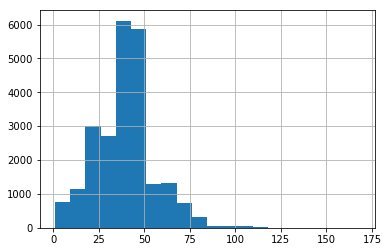

In [85]:
df['hs_trabajadas'].hist(bins=20)

In [86]:
import matplotlib.pyplot as plt

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


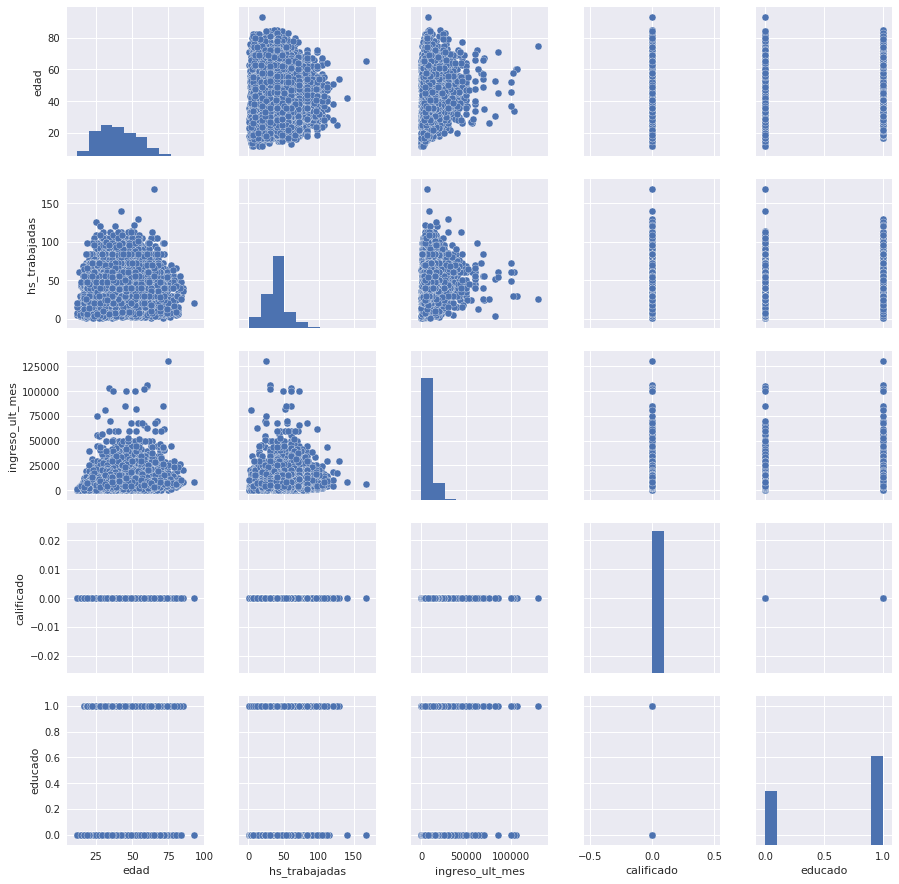

In [92]:
import seaborn as sns
df['educado'] = df['nivel_educativo'] == '2_Sec. comp y más'
df['calificado'] = df['nivel_educativo'] == '1_Prof./Tecn.'
sns.pairplot(df)